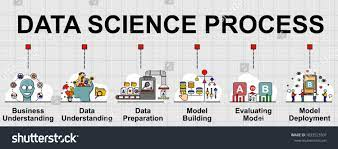

# CRISP-DM :
##### I am following CRoss Industry Structured Process for Data Mining is the most popular methodology for data science and advanced analytics projects. 

#### It has six steps: 

•Business Understanding

•Data Understanding

•Data Preparation

•Modeling

•Validation

•Deployment 


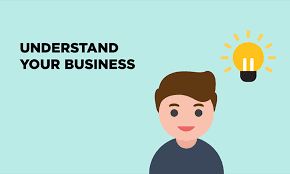

# Business Problem Definition : 
##### " We want to predict the price of freelance employees to offer them the best price for their work by analyzing features present in the dataset."

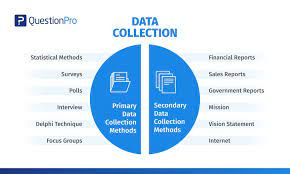

.

# Data Collection :

#####  " The Data Set is collected from kaggle having records of united state freelancers https://www.kaggle.com/datasets/dataranch/upwork-1 The dataset contain  freelancer records between (2007 and 2021 year) the sample size is about (>5000) records which is used to offer the best price to specific freelancer employee. "

####  Note : The Data Set Contain about 76 columns I take some important columns for prediction that plays important role for price prediction

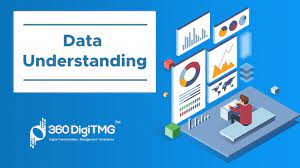

.

# Data Understading :

#### Features Definition:

##### Title : the title of the freelancer what skill he is offering .

##### Location : Location where the freelancer belongs to .

##### HourlyRate : Hourly rate what freelancer is offering .

##### AvgFeedbackScore : Feedback score people give after work is completed .

##### LastActivity : Last Activity shows when user last login and perform its task .

##### TotalHoursBilled : What is the total hourly billed charged it is just a total .

##### TotalFeedbacks : Total Feedbacks given by people .

##### TotalPortfolioItems : No of Portfolio items shown on the user profile .

##### Skills : Skill offering by specific user .

##### RecentAvgFeedbackScore : Recent Average Feeback Score given by people .

##### RecentTotalFeedbacks : Recent Total No of Feebacks .

##### RecentHoursBilled : Recent Houly Billed .

##### TotalHourlyJobs : Totaly Hourly Jobs done by freelancer .

##### TotalFixedPriceJobs : Total Fixed Price jobs done by freelancer .

##### CombinedTotalEarnings : Combine Total earning of hourly + Fixed Price Jobs .

##### CombinedRecentEarnings: Recent Combine Total earning of hourly + Fixed Price Jobs .

##### MemberSince : When a Person join freelance platform  .











#### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import pearsonr
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Reading Dataset 

In [2]:
Freelance_Data=pd.read_csv('Freelance Price Prediction.csv')

#### Number of Rows and Columns in the dataset

In [3]:
print('Total No of Rows are: {} and Total No of Columns are: {}'.format(Freelance_Data.shape[0],Freelance_Data.shape[1]))

Total No of Rows are: 5823 and Total No of Columns are: 17


#### Printing dataset to check no of columns and rows 

In [4]:
Freelance_Data.head(3)

,Title,Location,HourlyRate,AvgFeedbackScore,LastActivity,TotalHoursBilled,TotalFeedbacks,TotalPortfolioItems,Skills,RecentAvgFeedbackScore,RecentTotalFeedbacks,RecentHoursBilled,TotalHourlyJobs,TotalFixedPriceJobs,CombinedTotalEarnings,CombinedRecentEarnings,MemberSince
0,Expert WordPress Developer,"{'country': 'United States', 'city': 'Chicago'...","{'currencyCode': 'USD', 'amount': 60}",4.925208,2021-03-31T00:00:00.000Z,1861.333333,53,20,"[{'skill': {'name': 'wordpress', 'prettyName':...",4.925208,0,206.166667,58,41,86694.88,9411.33,1-Aug-16
1,Social Media Manager,"{'country': 'United States', 'city': 'Etna', '...","{'currencyCode': 'USD', 'amount': 20}",4.675676,2021-04-03T00:00:00.000Z,23.000000,2,1,[{'skill': {'name': 'social-media-content-crea...,4.675676,2,14.000000,5,1,1143.00,507.60,3-Feb-19
2,Solution Architect,"{'country': 'United States', 'city': 'Princeto...","{'currencyCode': 'USD', 'amount': 65}",0.000000,2021-04-03T00:00:00.000Z,10.000000,0,3,"[{'skill': {'name': 'oracle-java-ee', 'prettyN...",0.000000,0,10.000000,1,1,292.50,360.00,21-Jun-17


#### Checking the skewness of numerical columns of the data

#### Most of the variables shows right skewness because as we seen mean > median  so we have to apply transformation techniques to make our data normally distributed

In [5]:
Freelance_Data.describe()

,AvgFeedbackScore,TotalHoursBilled,TotalFeedbacks,TotalPortfolioItems,RecentAvgFeedbackScore,RecentTotalFeedbacks,RecentHoursBilled,TotalHourlyJobs,TotalFixedPriceJobs,CombinedTotalEarnings,CombinedRecentEarnings
count,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5.236000e+03,5236.000000
mean,4.322840,652.333211,21.849219,3.680920,3.739324,2.974068,110.208884,15.737421,22.589902,4.006761e+04,6470.824975
std,1.561695,1652.570875,52.635204,6.935874,2.071487,5.664062,237.551099,32.364804,63.301901,2.405826e+05,21687.601618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.771310,12.750000,2.000000,0.000000,3.816864,0.000000,0.000000,2.000000,1.500000,1.108005e+03,157.777500
50%,4.973319,104.333333,6.000000,1.000000,4.959588,1.000000,17.000000,5.000000,5.000000,6.250900e+03,1144.760000
75%,5.000000,554.566667,19.000000,5.000000,5.000000,3.000000,109.833333,16.000000,16.000000,2.958792e+04,5444.500000
max,5.000000,27455.303330,1413.000000,156.000000,5.000000,130.000000,3507.333333,697.000000,1640.000000,1.125739e+07,737095.610000


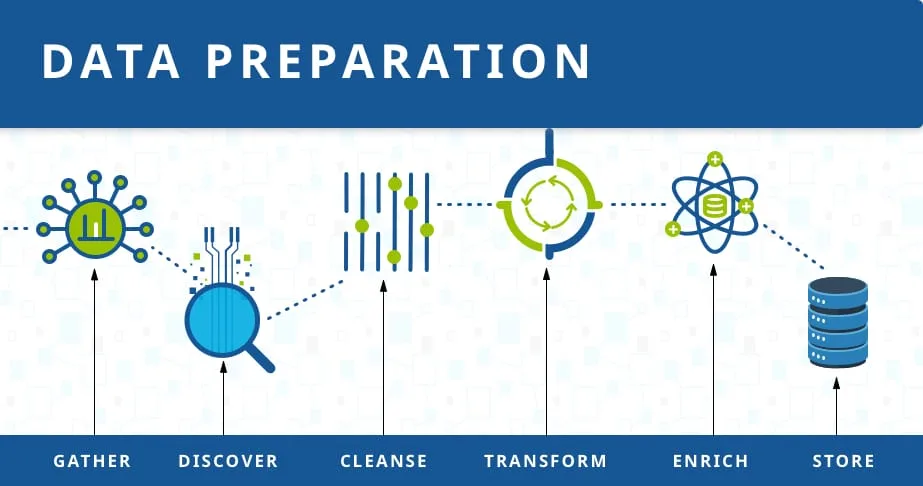

# Data Preparation :
##### " Most of the dataset is not in the standard format for our prediction so first we have to prepare to get better results "

#### We will Extract Different columns from the dataset to get better prediction results .

#### Get Location

In [6]:
Get_Location=[]
for i in Freelance_Data["Location"] :
    res = ast.literal_eval(i)
    Get_Location.append(res['city'])
Freelance_Data['City']=Get_Location

#### Get HourlyRate 

In [7]:
Hourly_Rate=[]
for i in Freelance_Data["HourlyRate"] :
    res = ast.literal_eval(i)
    Hourly_Rate.append(res['amount'])
Freelance_Data['HourlyRateUsd']=Hourly_Rate

#### I am Extracting skills from the title Column

In [8]:
Freelance_Data=Freelance_Data[['Title', 'AvgFeedbackScore','TotalFeedbacks','RecentAvgFeedbackScore', 'RecentTotalFeedbacks','LastActivity',
       'TotalHoursBilled', 'TotalPortfolioItems', 'RecentHoursBilled',
       'TotalHourlyJobs', 'TotalFixedPriceJobs', 'CombinedTotalEarnings',
       'CombinedRecentEarnings', 'MemberSince', 'City', 'HourlyRateUsd']]

#### Remove Special Characters and Represent All the tile Characters in title format

In [9]:
Freelance_Data['Title e']= Freelance_Data['Title'].str.replace('\W', ' ')
Freelance_Data['Title e']=Freelance_Data['Title e'].str.title()

C:\Users\Zigron\AppData\Local\Temp\ipykernel_14408\2362614457.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Freelance_Data['Title e']= Freelance_Data['Title'].str.replace('\W', ' ')


#### I am using general skills Categories that are used to sell any freelancer skills in the market

In [10]:
skills_list=['Developer','Social Media','Solution Architect','Logistics','Videographer','Designer','Marketing','Seo',
             'Recruiter','Engineer','Networking','Accounting',' Writer','Bookkeeper','Content Creator','Translator',
            'Copywriter','Accountant','Data','Communications Specialist','Assistant','Consultant',
            'Marketing','Copy Editor','Engineer','Sales','Editor','Assistant','Content',
            'Talent Acquisition Professional','Design','Translation','Writer',
             'Virtual Host','Clinical','Leadership','People Skills','Business',
             'Development','Video Production','3D Animation','3D Modeling','Ecommerce','Finance',
             'Financial Modeling','Artist','Photographer','Technology','Project Manager','Accounts','Admin','Specialist','Tax Practioner','Programmer',
             'Blogger','Advertising','Event Planner','Marketer','Advisor','Zendesk Specialist','Content Creator',
            'Career Services','Website','Web Dev','Crm Experts','Partnerships','Ppc Expert','Customer Support','Analytics','Google Expert','Brand','Telemarketing','Private Investigator',
             'Adobe Suite','Research','Assistant','Customer Service','Expert Proofreader',
            'Operations Expert','Researcher','Financial Expert','Real Estate','Business',
            'Full Stack','Insurance Consulting']

skills=[]
mila=''
             
for i in Freelance_Data['Title e'] :
    mila=''
    for j in skills_list :
        if j in i :
            mila=j
            skills.append(j)
            break
            
    if len(mila)== 0 :
        skills.append(np.NaN)
            
Freelance_Data['Skills']=skills

## Data Cleaning :

#### Dropping Null Values from the data

In [11]:
Freelance_Data=Freelance_Data.dropna()

In [12]:
Freelance_Data=Freelance_Data[['Skills', 'AvgFeedbackScore','TotalFeedbacks','RecentAvgFeedbackScore', 'RecentTotalFeedbacks','LastActivity',
       'TotalHoursBilled', 'TotalPortfolioItems', 'RecentHoursBilled',
       'TotalHourlyJobs', 'TotalFixedPriceJobs', 'CombinedTotalEarnings',
       'CombinedRecentEarnings', 'MemberSince', 'City', 'HourlyRateUsd']]

## Data Analysis and Validation

#### As we seen in the pairplot the dataset is not shows a normal distribution

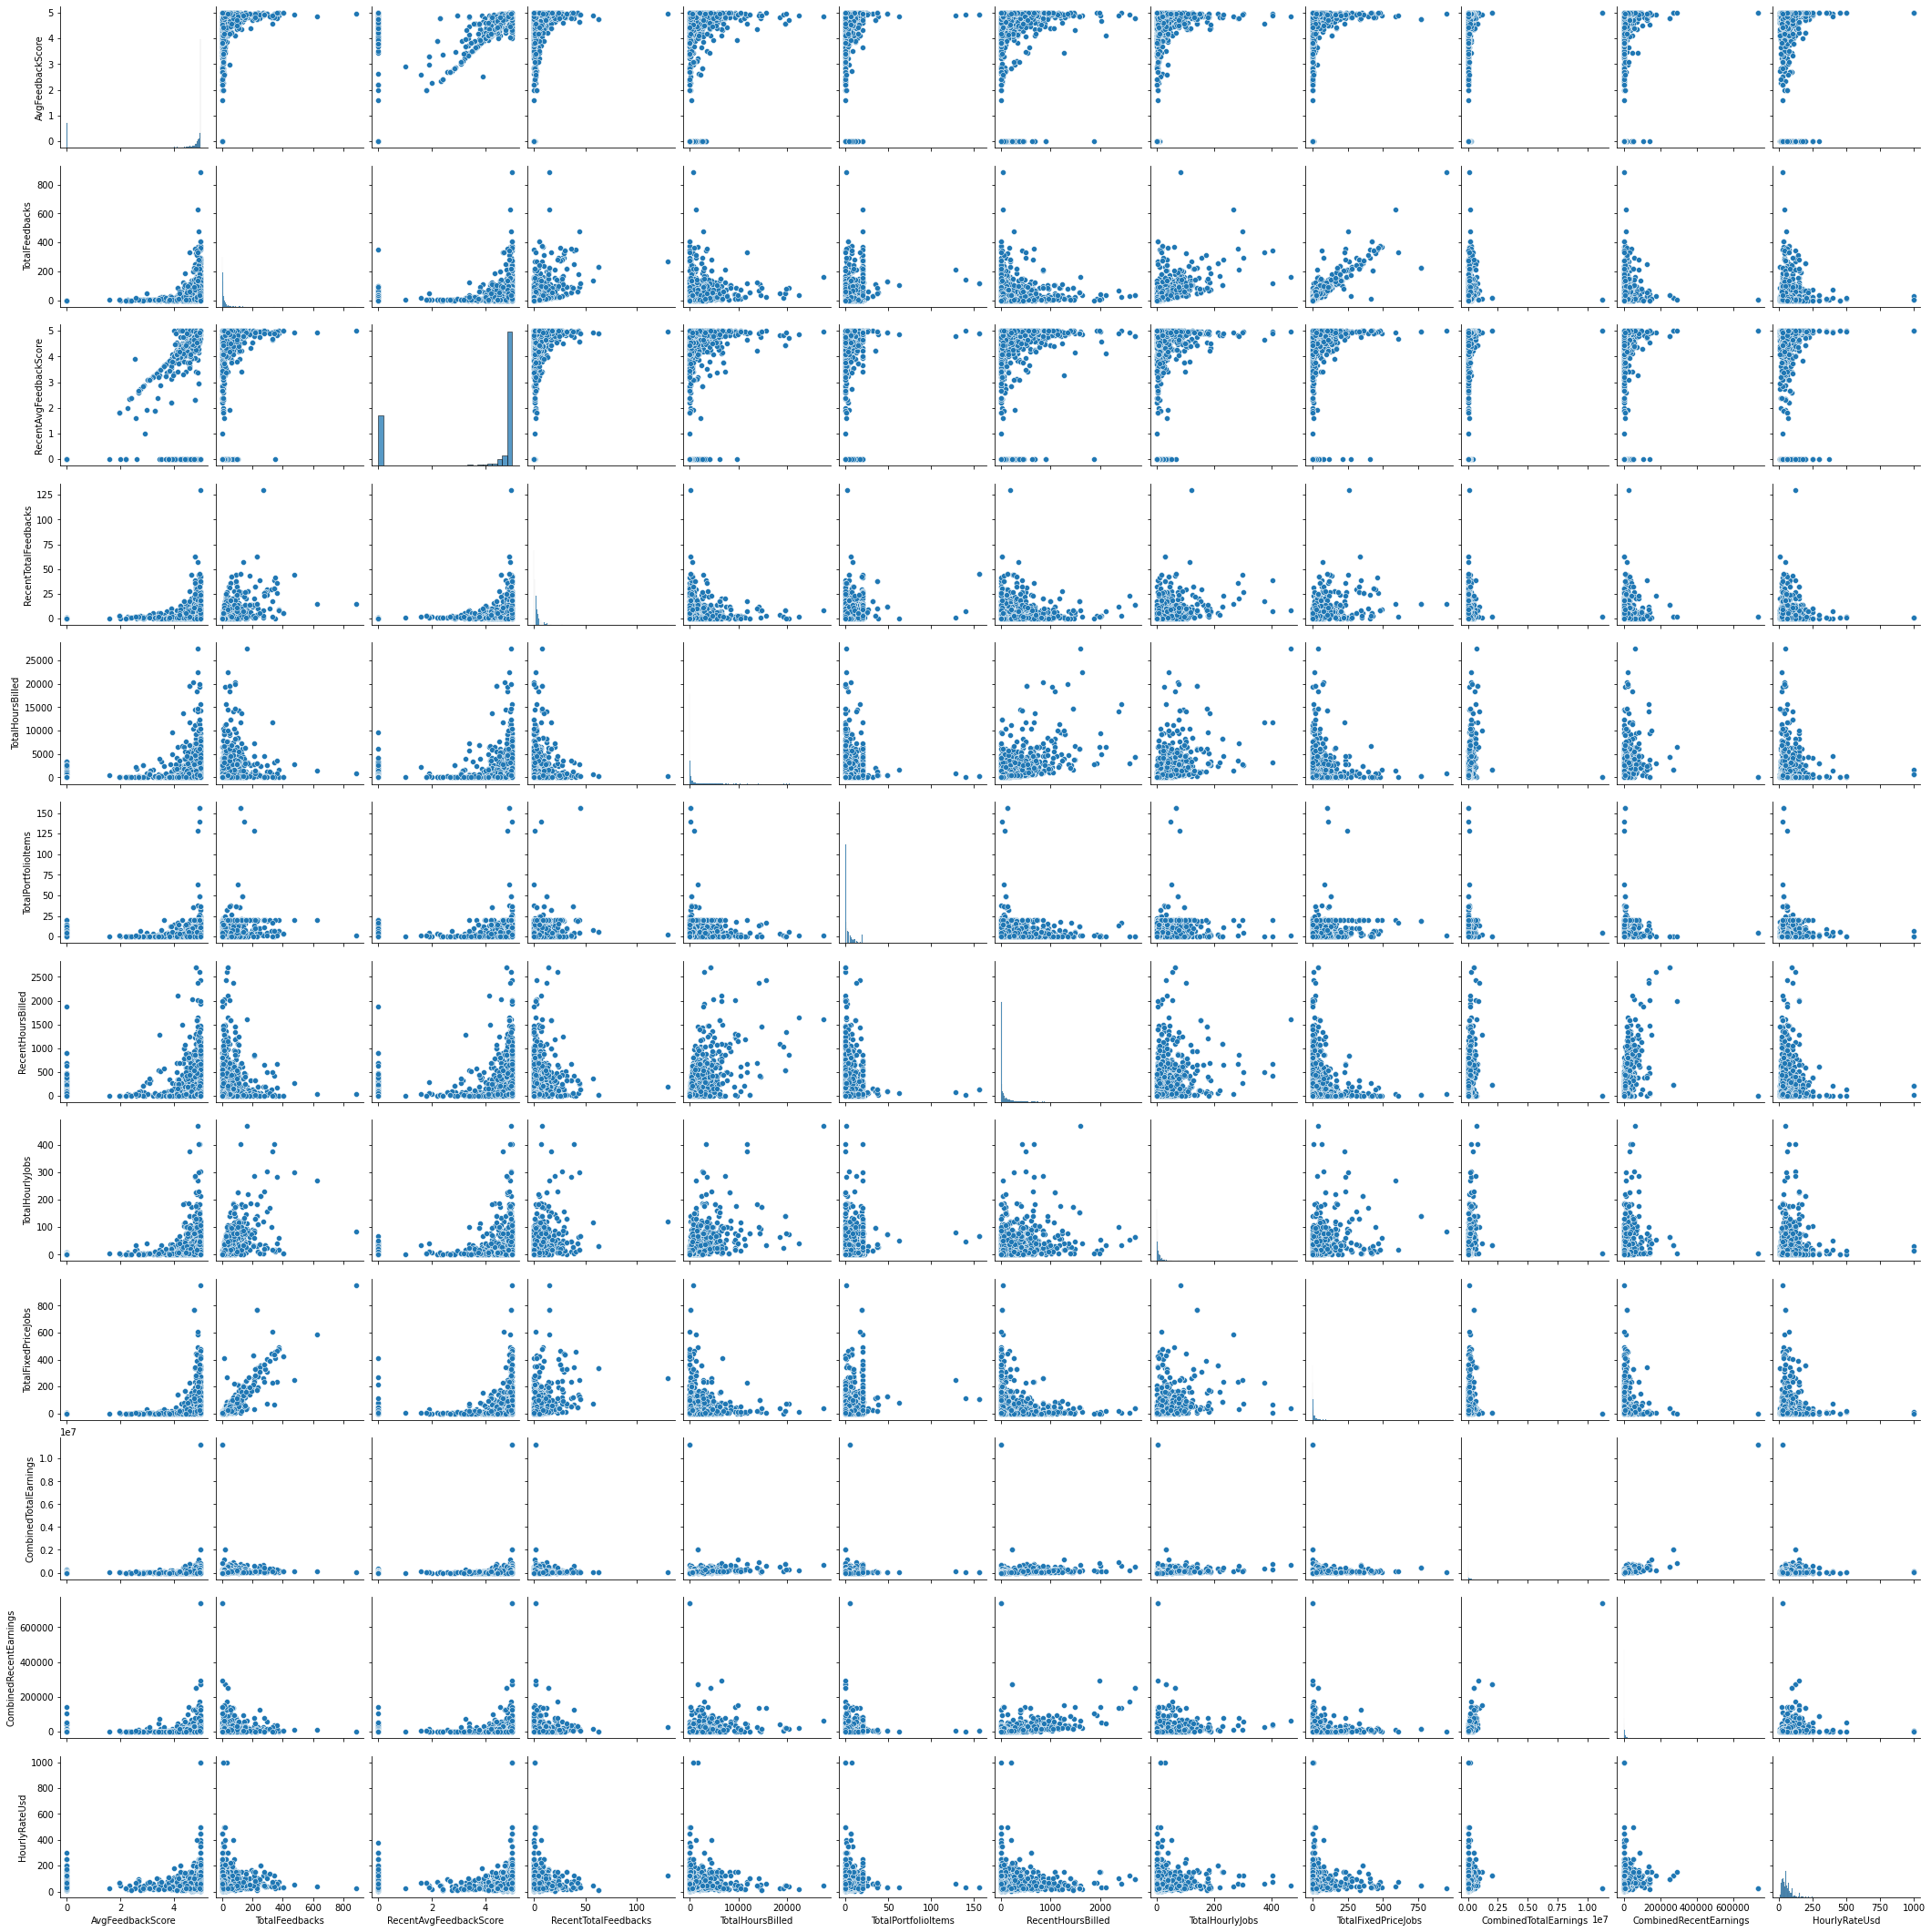

In [13]:
p=sns.pairplot(Freelance_Data)

#### Assumption 1 :

##### " Their is less linearity exsists between independent and dependent feature "

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


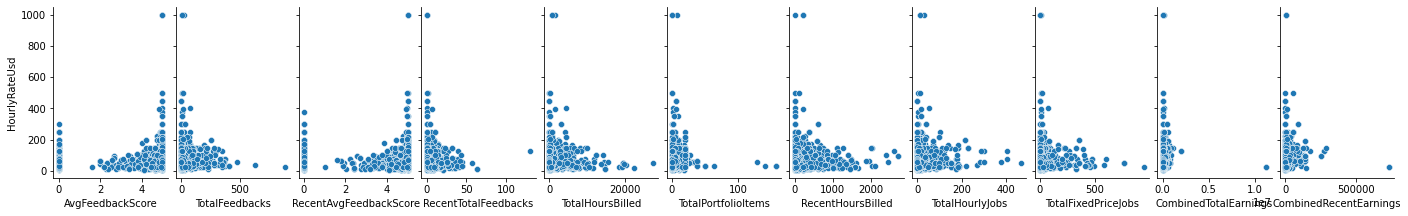

In [14]:
p=sns.pairplot(Freelance_Data, x_vars=['AvgFeedbackScore', 'TotalFeedbacks',
       'RecentAvgFeedbackScore', 'RecentTotalFeedbacks', 'TotalHoursBilled',
       'TotalPortfolioItems', 'RecentHoursBilled', 'TotalHourlyJobs',
       'TotalFixedPriceJobs', 'CombinedTotalEarnings',
       'CombinedRecentEarnings'], y_vars='HourlyRateUsd', size=3, aspect=0.6)

# Finding Correlation 

#### The Pearson correlation coefficient measures the linear association between variables. Its value can be interpreted like so:

###### +1 - Complete positive correlation
###### +0.8 - Strong positive correlation
###### +0.6 - Moderate positive correlation
###### 0 - no correlation whatsoever
###### -0.6 - Moderate negative correlation
###### -0.8 - Strong negative correlation
###### -1 - Complete negative correlation

#### Relation ship between input and output column the Pearson's correlation shows a very less or no assosiation between input and output features

In [15]:
# calculate the Pearson's correlation between two variables
for i in ['AvgFeedbackScore', 'TotalFeedbacks',
       'RecentAvgFeedbackScore', 'RecentTotalFeedbacks', 'TotalHoursBilled',
       'TotalPortfolioItems', 'RecentHoursBilled', 'TotalHourlyJobs',
       'TotalFixedPriceJobs', 'CombinedTotalEarnings',
       'CombinedRecentEarnings','HourlyRateUsd'] :
    data1 = Freelance_Data[i]
    data2 = Freelance_Data['HourlyRateUsd']
    corr, _ = pearsonr(data1, data2)
    print('Pearsons correlation ' + ' Between '+ i + ' and '+ 'HourlyRateUsd ' +' : ' + str(corr))

Pearsons correlation  Between AvgFeedbackScore and HourlyRateUsd  : 0.060504600318177934
Pearsons correlation  Between TotalFeedbacks and HourlyRateUsd  : 0.05952422762693569
Pearsons correlation  Between RecentAvgFeedbackScore and HourlyRateUsd  : 0.05843140415703177
Pearsons correlation  Between RecentTotalFeedbacks and HourlyRateUsd  : 0.0013654996977038004
Pearsons correlation  Between TotalHoursBilled and HourlyRateUsd  : 0.02784158903732555
Pearsons correlation  Between TotalPortfolioItems and HourlyRateUsd  : 0.04057170292253185
Pearsons correlation  Between RecentHoursBilled and HourlyRateUsd  : 0.029459793572233696
Pearsons correlation  Between TotalHourlyJobs and HourlyRateUsd  : 0.11411862876492913
Pearsons correlation  Between TotalFixedPriceJobs and HourlyRateUsd  : 0.02747222997878825
Pearsons correlation  Between CombinedTotalEarnings and HourlyRateUsd  : 0.05684130469734067
Pearsons correlation  Between CombinedRecentEarnings and HourlyRateUsd  : 0.13428093834900626
Pea

#### Assumption 2 :
##### "Their is less correlation between idependent variables so no multicollinearity exsists as such"

#### Relationship between independent features

#### There is also no multicollineraity between independent features

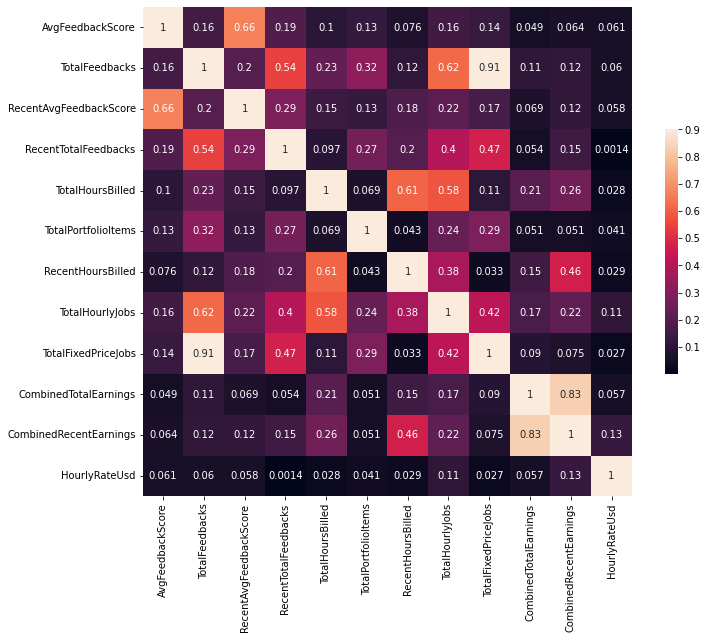

In [16]:
corrmat = Freelance_Data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, cbar_kws={"shrink": .5})
plt.show()

#### Assumption 3 :
##### "The number of observations are here is greater than the number of independent variables."

In [17]:
print('Total No of Rows are: {} and Total No of Columns are: {}'.format(Freelance_Data.shape[0],Freelance_Data.shape[1]))

Total No of Rows are: 4471 and Total No of Columns are: 16


### Feature Engineering

In [18]:
Freelance_Data['LastActivity'] = pd.to_datetime(Freelance_Data['LastActivity'], errors='coerce')
Freelance_Data['MemberSince'] = pd.to_datetime(Freelance_Data['MemberSince'], errors='coerce')

In [19]:
Freelance_Data['LastActivityYear']=Freelance_Data['LastActivity'].dt.year
Freelance_Data['LastActivityMonth']=Freelance_Data['LastActivity'].dt.month
Freelance_Data['LastActivityDay']=Freelance_Data['LastActivity'].dt.day

In [20]:
Freelance_Data['MemberSinceYear'] = Freelance_Data['MemberSince'].dt.year
Freelance_Data['MemberSinceMonth'] = Freelance_Data['MemberSince'].dt.month
Freelance_Data['MemberSinceDay'] = Freelance_Data['MemberSince'].dt.day

In [21]:
Freelance_Data['TotalExpInTermsOfYear']=2022-Freelance_Data['MemberSince'].dt.year

In [22]:
Freelance_Data=Freelance_Data[['Skills', 'AvgFeedbackScore', 'TotalFeedbacks',
       'RecentAvgFeedbackScore', 'RecentTotalFeedbacks',
       'TotalHoursBilled', 'TotalPortfolioItems', 'RecentHoursBilled',
       'TotalHourlyJobs', 'TotalFixedPriceJobs', 'CombinedTotalEarnings',
       'CombinedRecentEarnings','City','LastActivityYear', 'LastActivityMonth', 'LastActivityDay',
       'MemberSinceYear', 'MemberSinceMonth', 'MemberSinceDay',
       'TotalExpInTermsOfYear','HourlyRateUsd']]

### Data Prepocessing

#### There is No Null value in the data

In [23]:
Freelance_Data.isnull().sum()

Skills                    0
AvgFeedbackScore          0
TotalFeedbacks            0
RecentAvgFeedbackScore    0
RecentTotalFeedbacks      0
TotalHoursBilled          0
TotalPortfolioItems       0
RecentHoursBilled         0
TotalHourlyJobs           0
TotalFixedPriceJobs       0
CombinedTotalEarnings     0
CombinedRecentEarnings    0
City                      0
LastActivityYear          0
LastActivityMonth         0
LastActivityDay           0
MemberSinceYear           0
MemberSinceMonth          0
MemberSinceDay            0
TotalExpInTermsOfYear     0
HourlyRateUsd             0
dtype: int64

#### One Hot Encoding

###### "It is a technique used to encode the categorical into numerical format "

In [24]:
Freelance_Data=pd.get_dummies(Freelance_Data, columns=["Skills", "City"], prefix=["Skill", "City"])

#### No of Rows and Columns in the dataset

In [25]:
print('Total No of Rows are: {} and Total No of Columns are: {}'.format(Freelance_Data.shape[0],Freelance_Data.shape[1]))

Total No of Rows are: 4471 and Total No of Columns are: 1446


In [26]:
x = Freelance_Data.drop(["HourlyRateUsd"],axis=1)
y = Freelance_Data.HourlyRateUsd

#### Standard Scaler
##### Applying Strandard Scaler to transform the data

In [27]:

sc = StandardScaler()
X = sc.fit_transform(x)

# Data Modelling and Results Interpretation

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 44.665323052697424
R2 score is 0.20848906958475444


The model performance for testing set
--------------------------------------
RMSE is 1.6374321373226966e+16
R2 score is -1.3805338297788016e+29


In [29]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,Y_train)
svr_y_pred = svr.predict(X_train)

print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy: {}".format(svr.score(X_train,Y_train)))
print("R squared: {}".format(r2_score(y_true=Y_train,y_pred=svr_y_pred)))

The model performance for testing set
--------------------------------------
Accuracy: -0.008262872654025255
R squared: -0.008262872654025255


##### The Model do not show very good results in the testing phase because the R2 is  in negative direction

#### Assumption 4 :
##### "Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out."

#### The mean value is very large because cause highly influence on the data

In [30]:
residuals = Y_test.values-y_test_predict
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 531707434008803.2


#### Assumption 5:
##### "Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms"

#### ----------------------

#### Detecting heteroscedasticity! :

##### "Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present."

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


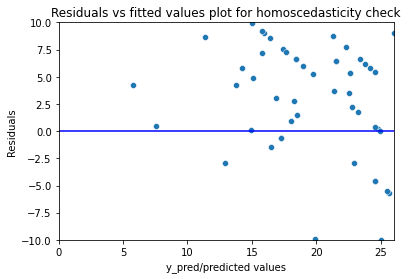

In [31]:
p = sns.scatterplot(y_test_predict,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


#### Now we will be applying tests. :

###### "if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis."

##### Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis that error terms are homoscedastic.


#### Goldfeld Quandt Test :

##### Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

###### Null Hypothesis: Error terms are homoscedastic
###### Alternative Hypothesis: Error terms are heteroscedastic.

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
print(lzip(name, test))

[('F statistic', 1.7176470623040692), ('p-value', 0.011485625530059818)]


#### Assumption No :6

##### "Error term will always have to show Normal Distribution"

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


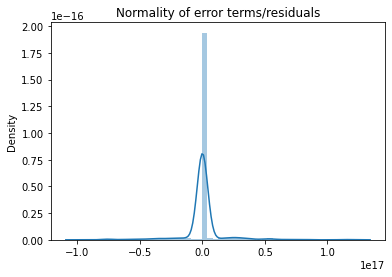

In [33]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

#### Assumption No : 7
##### "No autocorrelation exsists between the error terms in the data otherwise they cause distrubtion"

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


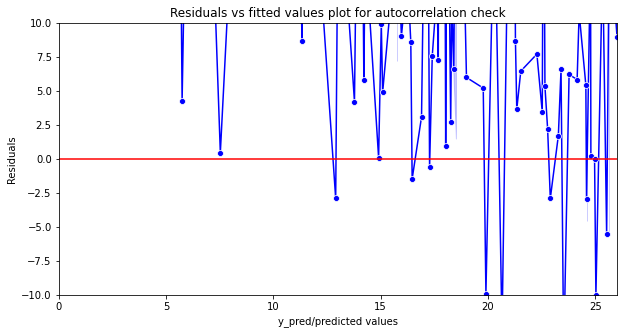

In [34]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_predict,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

##### Null Hypothesis: Autocorrelation is absent.

##### Alternative Hypothesis: Autocorrelation is present.

In [35]:
from statsmodels.stats import diagnostic as diag
print('Autocorrelation is absent :',min(np.array(diag.acorr_ljungbox(residuals , lags = 40)['lb_pvalue'])))

Autocorrelation is absent : 0.1042451263071411


# Select Minimum and Maximum Price Range

##### Given a Range of prices to freelancer we can set a treshhold to offer them a best price to work with client by taking their given rate and multiply with theshhold to give them a minimum and maximum price range to work.

### For Example we set a threshhold of 10% and you have a right to select the price range you want for specific category we select price <=5000.

In [36]:
price_Range=5000
for i in y_test_predict :
    if i > 0 and i <=price_Range:
        print('You can offer a Price Range Between',i-i*0.10,'and' ,i*0.10+i,'To this Freelancer')
        
    else :
        continue

You can offer a Price Range Between 63.196875 and 77.240625 To this Freelancer
You can offer a Price Range Between 107.353125 and 131.209375 To this Freelancer
You can offer a Price Range Between 50.990625 and 62.321875 To this Freelancer
You can offer a Price Range Between 3.796875 and 4.640625 To this Freelancer
You can offer a Price Range Between 54.703125 and 66.859375 To this Freelancer
You can offer a Price Range Between 38.165625 and 46.646875 To this Freelancer
You can offer a Price Range Between 50.315625 and 61.496875 To this Freelancer
You can offer a Price Range Between 63.1125 and 77.1375 To this Freelancer
You can offer a Price Range Between 24.103125 and 29.459375 To this Freelancer
You can offer a Price Range Between 12.515625 and 15.296875 To this Freelancer
You can offer a Price Range Between 63.8015625 and 77.9796875 To this Freelancer
You can offer a Price Range Between 17.803125 and 21.759375 To this Freelancer
You can offer a Price Range Between 88.5375 and 108.21

# ---------------------------------------------END---------------------------------------------